# Linear Programming optimization

***Linear Programming*** helps express a real-life problem as a linear mathematical model. It involves an Objective Function, Constraints and Decision Variables.

The goal on Linear Programming is to find the ***Values of Decisions variables***.



1.   **Objective Functions**: The objective function is a linear mathematical expression that represents the goal you want to maximize or minimize. It is typically expressed in the form of a linear equation. In a maximization problem, you seek to maximize this function, while in a minimization problem, you aim to minimize it.
2.   **Decision Variables**: Decision variables are the unknowns in your linear programming problem. They represent the quantities you are trying to determine. These variables are subject to constraints and are often used in the objective function.
3.   **Constraints**:Constraints are linear inequalities or equations that limit the possible values of the decision variables. They represent the limitations or restrictions in your problem. Constraints are conditions that must be satisfied.
4.   **Feasible Region**: The feasible region is the set of all possible combinations of values for the decision variables that satisfy the linear constraints. It is the region in the variable space where all constraints are met.

The Constraints are formulated as ***Linear Inequalities*** that define the limitations.

Since the mathematical model is expressed as linear equalities or inequalities, this model is called Linear Programming.


Let us consider a simple mathematical equation

Our objective here is to Maximize ```z```, the ***Objective Function*** is
```
z = 8x + 10y
```

This objective function is now subjected to below ***Constraints***.

Constraint 1: ```2x + 3y ≤ 7```

Constraint 2: ```3x + 4y ≤ 14```

To get the decisions *Variable Values/Fesiable Region*, we follow below step.

1.   **Plot each constraint lines**:
To plot this constraint, first rewrite it in slope-intercept form ```y = mx + b```:

  Constraint 1: ```2x + 3y ≤ 7``` ->  ```3y ≤ -2x + 7```  ->  ```y ≤ (-2/3)x + 7/3```

  Constraint 2: ```3x + 4y ≤ 14``` ->  ```4y ≤ -3x + 14```  ->  ```y ≤ (-3/4)x + 14/4```

  Now, plot these two lines on a coordinate system

2.  Determine the feasible.

3.  Identify the corner points: In the feasible region, you need to identify the corner points. These are the points where the lines intersect.

4.  Evaluate the objective function at each corner point:For each corner point, calculate the value of the objective function z = 8x + 10y.

5.  Find the maximum:The maximum value of z will be the largest value among all the corner points.

6.  The corner point that gives you the maximum value of z is the optimal solution.

Let's use python, matplotlib to visualize and solve a linear programming problem


# Python code implementing LPOpt

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Coefficients of the objective function to maximize (negated for maximization)
obj_fn = [-8, -10]

# Coefficients of the inequality constraints
a = np.array([[2, 3], [3, 4]])

# Right-hand side of the inequality constraints
b = [7, 14]

# Bounds for x and y (x >= 0, y >= 0 by default)
x_bounds = (0, None)
y_bounds = (0, None)

In [80]:
# Solve the linear programming problem
result = linprog(obj_fn, A_ub=a, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')
print()

# Extract the optimal solution
x_optimal, y_optimal = result.x
z_optimal = -result.fun  # Negate the result to get the maximum value

print(result)

# Print the optimal values
print("Optimal solution:")
print(f"x = {x_optimal}")
print(f"y = {y_optimal}")
print(f"z = {z_optimal}")


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -28.0
              x: [ 3.500e+00  0.000e+00]
            nit: 2
          lower:  residual: [ 3.500e+00  0.000e+00]
                 marginals: [ 0.000e+00  2.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  3.500e+00]
                 marginals: [-4.000e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0
Optimal solution:
x = 3.5
y = 0.0
z = 28.0


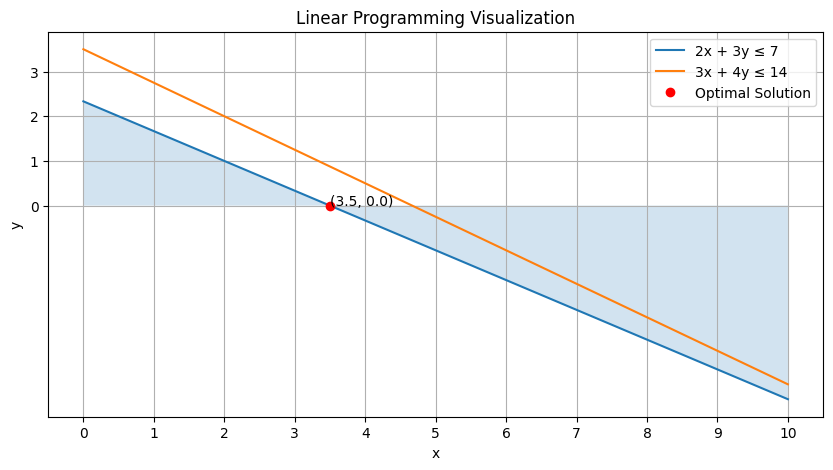

In [81]:
#plotting the problem in graph
fig, ax = plt.subplots(figsize=(10, 5))

# Define the x and y axis tick values with 1 unit intervals
x_ticks = np.arange(0, 11, 1)
y_ticks = np.arange(0, 11, 1)

# Set the ticks on the x and y axes
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Define the feasible region
x = np.linspace(0, 10, 400)
y = np.linspace(0, 10, 400)
X, Y = np.meshgrid(x, y)

for i in range(len(a)):
    plt.plot(x, (b[i] - a[i, 0] * x) / a[i, 1], label=f'{a[i, 0]}x + {a[i, 1]}y ≤ {b[i]}')

# Shade the feasible region
plt.fill_between(x, np.minimum((b[0] - a[0, 0] * x) / a[0, 1], (b[1] - a[1, 0] * x) / a[1, 1]), where=(x >= 0), alpha=0.2)

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot the optimal solution point
plt.plot(x_optimal, y_optimal, 'ro', label='Optimal Solution')
plt.text(x_optimal, y_optimal, '({}, {})'.format(x_optimal, y_optimal))

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.title('Linear Programming Visualization')
plt.grid(True)
plt.show()

# Analogy

So, above python code uses the ***linprog*** from ***scipy.optimize*** linear programming solver in the SciPy library. More details on the linprog function click [here](https://www.mathworks.com/help/optim/ug/linprog.html)


Now, if ew apply the above objective function, constraints and connect them with real-life problem, the optimized value we get is very much sigficant.

Let us consider there is an Ice cream shop, that sells 2 types of Ice cream. Details as follows

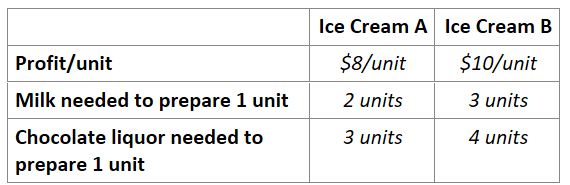

If company receives a limited amount of Milk and Chocolate for a week, but company wants to maximize the profit by create as many units of Ice Creams as possible for both types A and B.

The company can reserve 7 units of milt and 14 units of Chocolate liquor for a week.

Mathematical Model for this problem:

X and Y are decisions variables

X - Units of type A

Y - Units of type B

Z - Profit

Maximize ```Z = 8X + 10Y``` -> *Objective function*

Limited supplies of milk and chocolate liquor creates the constraints, i.e. linear inequalities.

```2X + 3Y ≤ 7```

2, 3 are units of milk required for A and B respectively and 7 is units of milk the company can reserve for a week.

```3X + 4Y ≤ 14```

3, 4 are units of chocolate liquor required for A and B respectively and 14 is units of chocolate liquor the company can reserve for a week.


So, the output of above LPOpt gives us the optimal solution as

X = 3.5 -> 3.5 Units of X type, i.e. Ice Cream A

Y = 0.0 -> 30 Units of Y type, i.e. Ice Cream B

Z = 28.0 -> Yeild the maximun profit of 28.0

Meaning Making approximately 3.5 units of Ice Cream Type A will yeild the maximun profit for the given scenario (Constraints).

This is small application of Linear Programming Optimiaztion, which can be used over large instance to get optimal solutions for resource allocation, production planning, transportation, or portfolio optimization and so on.

In [82]:
#consider one more example for better understanding
'''
Maxmize z = 5x + 7y
4x + y <= 6
-7x + 3y <= 10
x - 2y >= -2
-x + 10y = 15
bounds:
x >=0
y >=0
'''

'\nMaxmize z = 5x + 7y\n4x + y <= 6\n-7x + 3y <= 10\nx - 2y >= -2\n-x + 10y = 15\nbounds:\nx >=0\ny >=0\n'

In [83]:
obj_fn2 = [-5, -7]

a2 = np.array([[4, 1], [-7, 3], [1, -2], [-1, 10]])

# Right-hand side of the inequality constraints
b2 = [6, 10, -2, 15]

# Bounds for x and y (x >= 0, y >= 0 by default)
x_bounds = (0, None)
y_bounds = (0, None)

result2 = linprog(obj_fn2, A_ub=a2, b_ub=b2, bounds=[x_bounds, y_bounds], method='highs')
print()

# Extract the optimal solution
x_optimal2, y_optimal2 = result2.x
z_optimal2 = -result2.fun  # Negate the result to get the maximum value

print(result2)

# Print the optimal values
print("Optimal solution:")
print(f"x = {x_optimal2}")
print(f"y = {y_optimal2}")
print(f"z = {z_optimal2}")


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -16.756097560975608
              x: [ 1.098e+00  1.610e+00]
            nit: 2
          lower:  residual: [ 1.098e+00  1.610e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  1.285e+01  1.220e-01  0.000e+00]
                 marginals: [-1.390e+00 -0.000e+00 -0.000e+00 -5.610e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0
Optimal solution:
x = 1.0975609756097562
y = 1.6097560975609753
z = 16.756097560975608


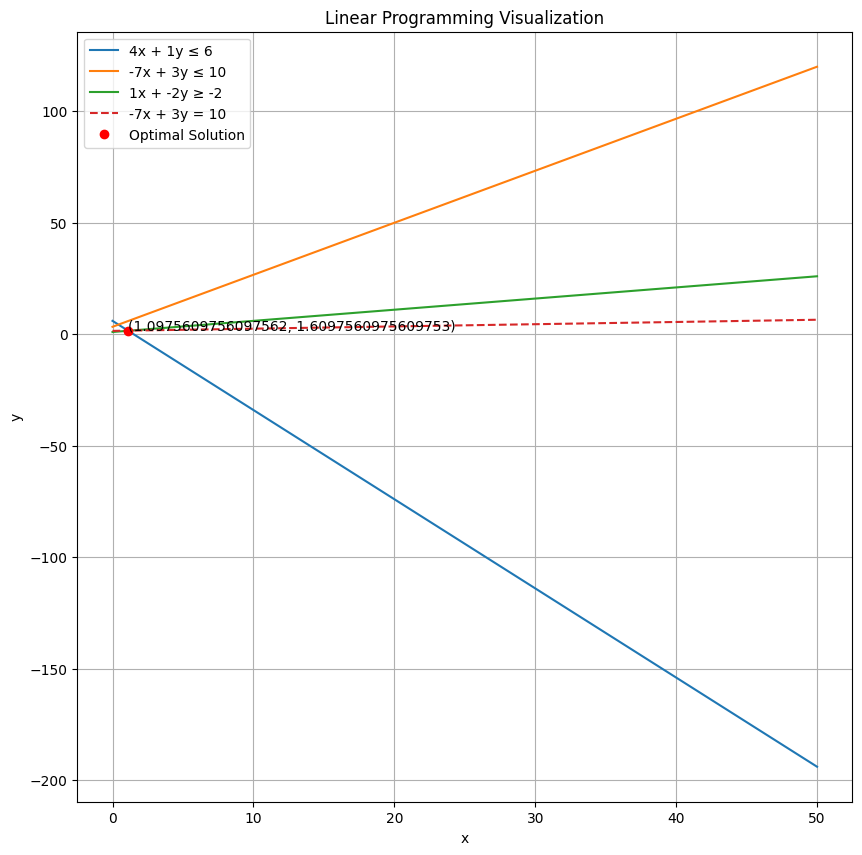

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))

# Define the feasible region
x = np.linspace(0, 50)
y = np.linspace(0, 50)
X, Y = np.meshgrid(x, y)

for i in range(len(a2)-1):
  if i == 0 or i == 1:
    plt.plot(x, (b2[i] - a2[i, 0] * x) / a2[i, 1], label=f'{a2[i, 0]}x + {a2[i, 1]}y ≤ {b2[i]}')
  else:
    plt.plot(x, (b2[i] - a2[i, 0] * x) / a2[i, 1], label=f'{a2[i, 0]}x + {a2[i, 1]}y ≥ {b2[i]}')

plt.plot(x, (b2[len(a2)-1] - a2[len(a2)-1, 0] * x) / a2[len(a2)-1, 1], linestyle='--', label=f'{a2[len(a)-1, 0]}x + {a2[len(a)-1, 1]}y = {b2[len(a)-1]}')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot the optimal solution point
plt.plot(x_optimal2, y_optimal2, 'ro', label='Optimal Solution')
plt.text(x_optimal2, y_optimal2, '({}, {})'.format(x_optimal2, y_optimal2))

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.title('Linear Programming Visualization')
plt.grid(True)
plt.show()